# Session 1

In this first session we will familiarize ourselves with the working environment and some datasets, starting with iris. Then, you can follow with digits and olivetti. Finally, you should get to know the openml platform from which a dataset will be drawn as part of the exercise in the exam.

<p style="page-break-after:always;"></p>

# The Iris dataset

The Iris dataset has been widely used to introduce basic machine learning concepts and methods. It consists of $N=150$ samples, $50$ for each of $C=3$ classes, represented by vectors of $D=4$ homogeneous real features. One of the classes is linearly separable from the rest, but the other two are not linearly separable. Although today it is considered a "toy" dataset, it is still very useful for introducing basic concepts and methods.

First we import some standard and sklearn libraries:

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

Reading the Iris dataset:

In [2]:
iris = load_iris()
print(dir(iris))
X = iris.data 
y = iris.target
fn = iris.feature_names
cn = iris.target_names
print(iris.DESCR)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ==========

<p style="page-break-after:always;"></p>

We convert the corpus into a pandas dataframe to facilitate its description:

In [3]:
data = pd.DataFrame(data=X, columns=fn)
data['species'] = pd.Series(iris.target_names[y], dtype='category')
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<p style="page-break-after:always;"></p>

Let's look at some basic statistics:

In [4]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We check that we have $50$ samples of each class:

In [5]:
data.groupby('species', observed=False).size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

<p style="page-break-after:always;"></p>

Since we have few features, it's a good idea to make a scatter matrix plot:

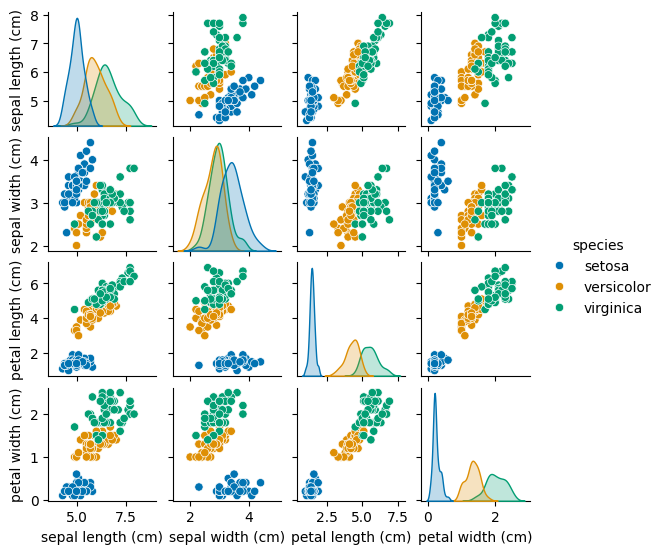

In [6]:
sns.pairplot(data, hue="species", height = 1.4, palette = 'colorblind');

**Question:** which class is linearly separated from the other two?

#The Digits dataset

Like iris, Digits can be considered a "toy" dataset. However, compared to iris, Digits represents a jump of complexity due to the greater number of classes, $C=10$, samples, $N=1797$, and dimension of feature vectors, $D=64$. In addition, digits addresses one of the main perceptual tasks of machine learning: optical character recognition (OCR) and, more specifically, handwritten digit recognition. Although handwritten digit recognition has been considered a "solved" task since the 1990s, image classification in general remains a complex task of great academic and commercial interest. So the relative simplicity of Digits is very convenient as an introductory task to image classification.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

<p style="page-break-after:always;"></p>

Let's see the first $10$ images:

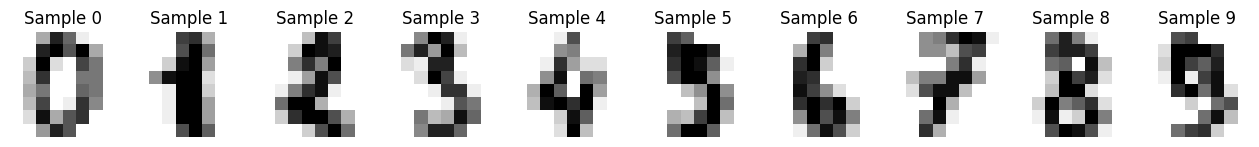

In [3]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(16, 16))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="none")
    ax.set_title("Sample {!s}".format(label))

<p style="page-break-after:always;"></p>

# The Olivetti dataset

Olivetti contains $N=400$ face images of $C=40$ people, with 10 images per person. The images were acquired at different times, varying the lighting, facial expression (eyes closed or not; smiling or not) and facial details (with or without glasses). All of them are normalized to $64\times 64$ grayscale pixels between $0$ and $1$; that is, each image can be seen as a vector of $D=4096$ dimensions of real features in $[0, 1]$. People are identified with an integer class label from $0$ to $39$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

In [2]:
orl = fetch_olivetti_faces()
print(orl.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

Let's see the first image of each person:

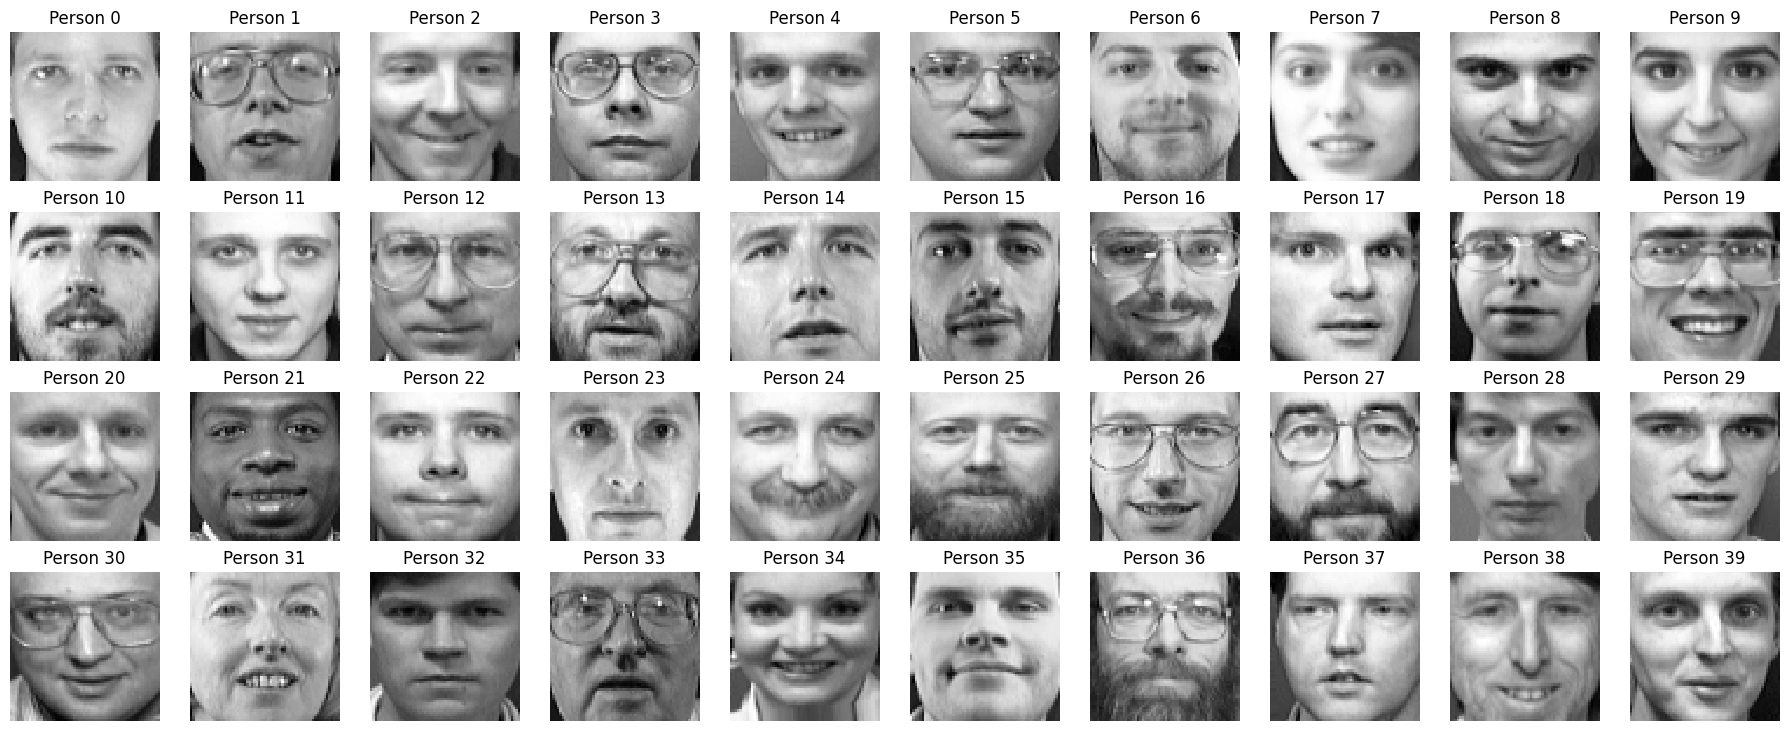

In [3]:
nrows, ncols = 4, 10
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
for c in np.arange(0, 40):
    ax = axes.flat[c]; ax.set_axis_off(); ax.set_title(f"Person {c}")
    ax.imshow(orl.images[10*c], cmap=plt.cm.gray, interpolation="none")

<p style="page-break-after:always;"></p>

Let's see some people's $10$ images:

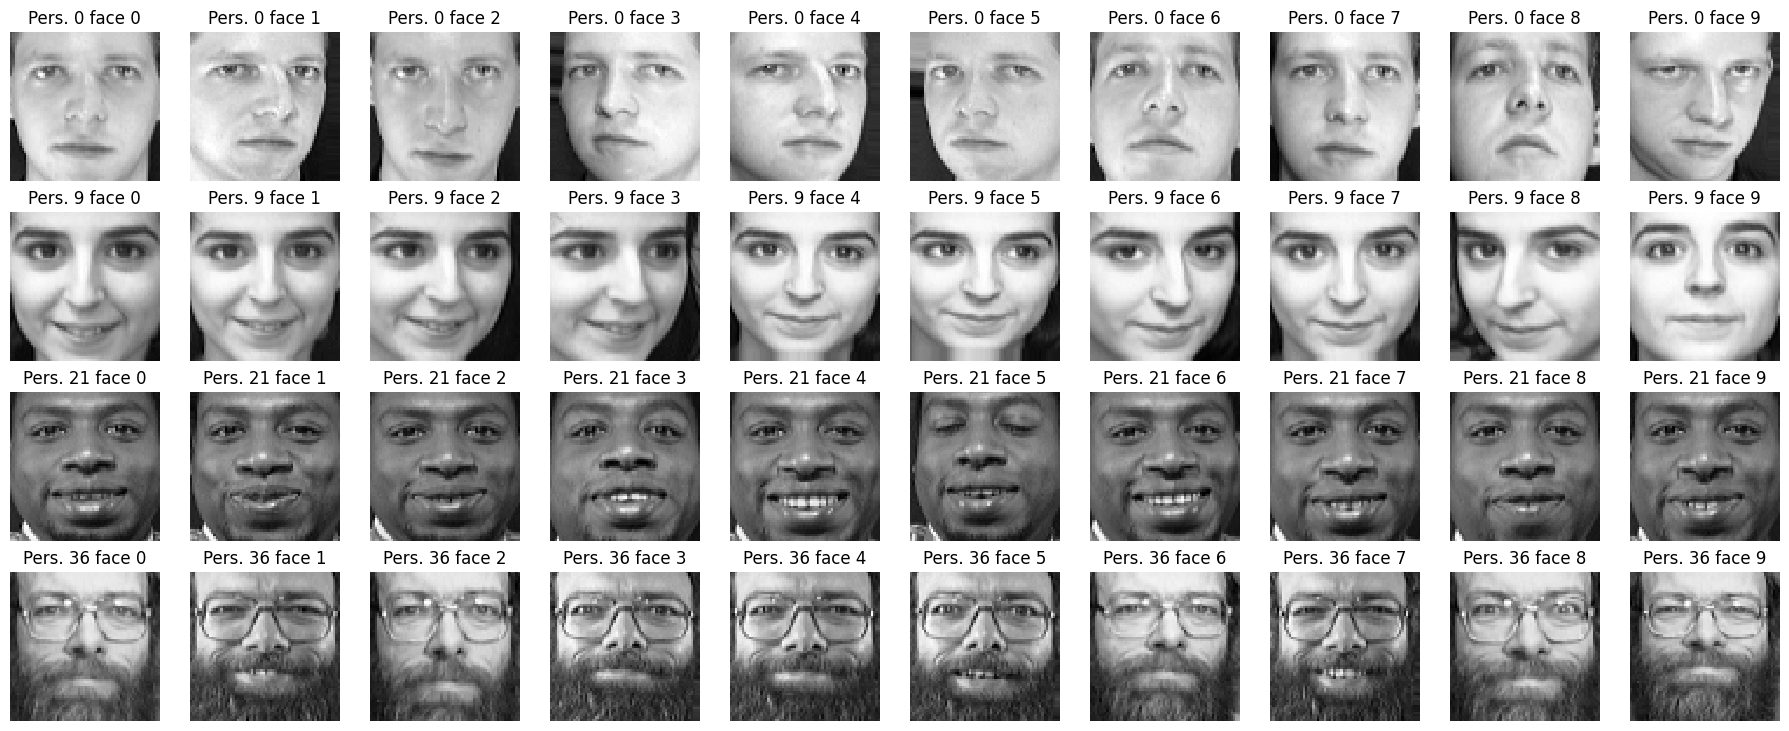

In [4]:
cc = [0, 9, 21, 36]
nrows, ncols = len(cc), 10
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
for i, c in enumerate(cc):
    for j in np.arange(0, 10):
        ax = axes.flat[10*i+j]; ax.set_axis_off(); ax.set_title(f"Pers. {c} face {j}")
        ax.imshow(orl.images[10*c+j], cmap=plt.cm.gray, interpolation="none")

<p style="page-break-after:always;"></p>

# openml

[openml.org](https://openml.org) is an open platform for sharing datasets, algorithms and machine learning experiments with tabulated data. The main concepts on which it is based are:
* **Dataset:** $\;$ set of tabulated data
* **Task:** $\;$ data set, learning task to be performed and evaluation method
* **Flow:** $\;$ machine learning pipeline with details on software to use and hyperparameters to adjust
* **Run:** $\;$ evaluation experiment of a flow in a task

The choice of datasets can be made in the [datasets](https://openml.org/search?type=data) section. The chosen datasets can be downloaded directly or using sklearn's [fetch_openml](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html#sklearn.datasets.fetch_openml) function. However, in general it is preferable to choose datasets previously chosen by other users (with some specific criteria) and published in the [benchmarks](https://openml.org/search?type=benchmark) section. In particular, we can highlight three recent "benchmark suites" for comparing and evaluating classification techniques:
* **OpenML-CC18 Curated Classification benchmark:** $\;$ $72$ sets from [Bahri et al, 2022](https://arxiv.org/abs/2106.15147)
* **Tabular benchmark categorical classification:** $\;$ $7$ sets from [Grinsztajn et al, 2022](https://arxiv.org/abs/2207.08815)
* **AutoML Benchmark All Classification:** $\;$ $71$ sets from [Gijsbers et al, 2019](https://arxiv.org/abs/1907.00909)

In [ ]:
!pip install openml

<p style="page-break-after:always;"></p>

In [2]:
import openml
# OpenML-CC18 99; Tabular 334; AutoML 271
benchmark_suite = openml.study.get_suite(suite_id=334)
benchmark_suite

OpenML Benchmark Suite
ID..............: 334
Name............: Tabular benchmark categorical classification
Status..........: in_preparation
Main Entity Type: task
Study URL.......: https://www.openml.org/s/334
# of Data.......: 7
# of Tasks......: 7
Creator.........: https://www.openml.org/u/26324
Upload Time.....: 2023-01-16 03:22:41

In [3]:
openml.datasets.list_datasets(data_id=benchmark_suite.data, output_format='dataframe')

,did,name,version,uploader,status,format,MajorityClassSize,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
44156,44156,electricity,13,26324,active,arff,19237.0,19237.0,2.0,9.0,38474.0,0.0,0.0,7.0,2.0
44157,44157,eye_movements,8,26324,active,arff,3804.0,3804.0,2.0,24.0,7608.0,0.0,0.0,20.0,4.0
44159,44159,covertype,13,26324,active,arff,211840.0,211840.0,2.0,55.0,423680.0,0.0,0.0,10.0,45.0
45035,45035,albert,2,26324,active,arff,29126.0,29126.0,2.0,32.0,58252.0,0.0,0.0,21.0,11.0
45036,45036,default-of-credit-card-clients,4,26324,active,arff,6636.0,6636.0,2.0,22.0,13272.0,0.0,0.0,20.0,2.0
45038,45038,road-safety,7,26324,active,arff,55881.0,55881.0,2.0,33.0,111762.0,0.0,0.0,29.0,4.0
45039,45039,compas-two-years,5,26324,active,arff,2483.0,2483.0,2.0,12.0,4966.0,0.0,0.0,3.0,9.0


<p style="page-break-after:always;"></p>

In [4]:
openml.tasks.list_tasks(task_id=benchmark_suite.tasks, output_format="dataframe")

,tid,ttid,did,name,task_type,status,estimation_procedure,evaluation_measures,source_data,target_feature,MajorityClassSize,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
361110,361110,TaskType.SUPERVISED_CLASSIFICATION,44156,electricity,Supervised Classification,active,10-fold Crossvalidation,predictive_accuracy,44156,class,19237,19237,2,9,38474,0,0,7,2
361111,361111,TaskType.SUPERVISED_CLASSIFICATION,44157,eye_movements,Supervised Classification,active,10-fold Crossvalidation,predictive_accuracy,44157,label,3804,3804,2,24,7608,0,0,20,4
361113,361113,TaskType.SUPERVISED_CLASSIFICATION,44159,covertype,Supervised Classification,active,10-fold Crossvalidation,predictive_accuracy,44159,class,211840,211840,2,55,423680,0,0,10,45
361282,361282,TaskType.SUPERVISED_CLASSIFICATION,45035,albert,Supervised Classification,active,10-fold Crossvalidation,predictive_accuracy,45035,class,29126,29126,2,32,58252,0,0,21,11
361283,361283,TaskType.SUPERVISED_CLASSIFICATION,45036,default-of-credit-card-clients,Supervised Classification,active,10-fold Crossvalidation,predictive_accuracy,45036,y,6636,6636,2,22,13272,0,0,20,2
361285,361285,TaskType.SUPERVISED_CLASSIFICATION,45038,road-safety,Supervised Classification,active,10-fold Crossvalidation,predictive_accuracy,45038,SexofDriver,55881,55881,2,33,111762,0,0,29,4
361286,361286,TaskType.SUPERVISED_CLASSIFICATION,45039,compas-two-years,Supervised Classification,active,10-fold Crossvalidation,predictive_accuracy,45039,twoyearrecid,2483,2483,2,12,4966,0,0,3,9


Accessing to one of the dataset ("electricity") by their data id provided in the list of datasets above.

In [5]:
from sklearn.datasets import fetch_openml
# data id corresponding to dataset "electricity" with 9 features and 2 classes
data_id = 44156
X, y = fetch_openml(data_id=data_id, return_X_y=True, as_frame=False, parser="liac-arff")